# Introduction¶

"Helsinki Cycling data analysis during years 2014-2019" is a study project of the Data Analysis by Python training program. The datasets are located at the web site "Helsinki Region Infoshare". There are four parts implemented by four persons as below:

Part 1: Data fetching and Data Cleaning.<br>
Part 2: Data grouping and Visualizing.<br>
Part 3: Data analysis among Helsinki measurement stations and the weather impact.<br>
Part 4: Data analysis within main traffic routes on Map.

This notebook represents the Part 2: Data grouping and Visualizing.


###### Contents of the Notebook:
    1)Fetching data and construct dataframes for Espoo, Vantaa and Helsinki
      Make basic plots to see the availability of the each datasets
    2)Choose subsets of the datasets to grouping and ploting
      Find Extreme values of each range
    3)Helsinki, Vantaa and Espoo Cycling data and Hourly Profiles in 2018
      Compare it with the results listed in webpage:
     https://www.eco-compteur.com/en/2019-worldwide-cycling-index/

###### 1. Fetching data and construct dataframes for Espoo, Vantaa and Helsinki


In [23]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

In [24]:
url_bike_hel='https://raw.githubusercontent.com/srenoes/ShortCut-HSL-group-work/master/Final_Project_Material_Geonobles_1/HelsinkiBikers_cleanDataset.csv'
url_bike_van='https://raw.githubusercontent.com/srenoes/ShortCut-HSL-group-work/master/Final_Project_Material_Geonobles_1/VantaaBikers_cleanDataset.csv'
url_bike_esp='https://raw.githubusercontent.com/srenoes/ShortCut-HSL-group-work/master/Final_Project_Material_Geonobles_1/EspooBikers_cleanDataset.csv'

In [25]:
apps_hel = pd.read_csv(url_bike_hel)
apps_van = pd.read_csv(url_bike_van)
apps_esp = pd.read_csv(url_bike_esp)
apps_hel.head(3)

,Weekday,Date,Time,Auroransilta,Etelaesplanadi,Huopalahti (station),Kaisaniemi/ Elaintarhanlahti,Kaivokatu,Kulosaari bridge south,Kulosaari bridge north,...,Merikannontie,Munkkiniemi bridge south side,Munkkiniemi bridge north side,Heperia park/Ooppera,Pitkasilta east side,Pitkasilta west side,Lauttasaari bridge north side,Ratapihantie,Viikintie,Baana
0,Wed,2014-01-01,00:00:00,NaN,7.0,NaN,1.0,NaN,NaN,NaN,...,NaN,2.0,5.0,3.0,NaN,11.0,NaN,NaN,NaN,8
1,Wed,2014-01-01,01:00:00,NaN,5.0,NaN,3.0,NaN,NaN,NaN,...,NaN,6.0,5.0,1.0,NaN,8.0,NaN,NaN,NaN,4
2,Wed,2014-01-01,02:00:00,NaN,2.0,NaN,3.0,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,NaN,14.0,NaN,NaN,NaN,11


1.1 Espoo Cycling Dataframe
- Form the dataframe rows(hour based) and coulumns based one the sum of each stations' data.
- Plot sum data grouped by the date so that we can provide the intervals for further analysis


In [26]:
apps_esp['Date']=pd.to_datetime(apps_esp.Date,errors='coerce')
apps_esp['Weekday'] = apps_esp['Date'].apply(lambda x: calendar.day_name[x.weekday()])
apps_esp['Esp_Sum']=apps_esp.iloc[:,3:].sum(axis=1)
apps_esp['Esp_Mean']=apps_esp.iloc[:,3:-1].mean(axis=1)
apps_esp_sm=apps_esp[['Weekday','Date','Time','Esp_Sum','Esp_Mean']]
apps_esp_sm[apps_esp_sm.Esp_Mean.isnull()==True].count()
apps_esp_sm.head()

,Weekday,Date,Time,Esp_Sum,Esp_Mean
0,Friday,2014-01-03,00:00:00,0.0,NaN
1,Friday,2014-01-03,01:00:00,0.0,NaN
2,Friday,2014-01-03,02:00:00,0.0,NaN
3,Friday,2014-01-03,03:00:00,0.0,NaN
4,Friday,2014-01-03,04:00:00,0.0,NaN


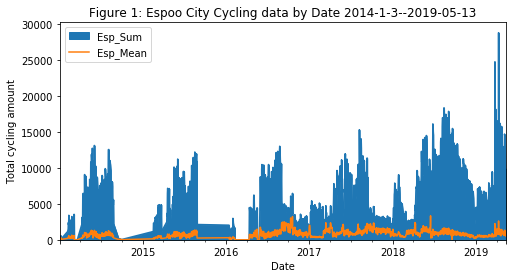

In [27]:
apps_esp_sm_d=apps_esp_sm.groupby('Date').sum()
by_d=pd.DatetimeIndex(apps_esp_sm.Date).to_period("D")
apps_esp_sm_d=apps_esp_sm.groupby(by_d).sum()
df_esp=pd.DataFrame(apps_esp_sm_d,index=apps_esp_sm_d.index,columns=['Esp_Sum', 'Esp_Mean']);
fig, ax = plt.subplots(figsize=(8,4))
df_esp_sum=df_esp.sort_index().plot(kind='area',y='Esp_Sum',title=('Figure 1: Espoo City Cycling data by Date 2014-1-3--2019-05-13'),rot=0,fontsize=10,ax=ax);
df_esp_mean=df_esp.sort_index().plot(kind='line', y=['Esp_Mean'], ax=ax, secondary_y=False)
df_esp_sum.set_ylabel('Total cycling amount')
l = plt.axhline(y=0, linewidth=1, color='black')


###### The input dataset can have following types of data:
1.Missing rows<br>
2.Rows with missing data only<br>
3.Rows with 0.0 values and missing data only<br>
4.Rows with data and missing values<br>

Thu,2014-09-25,23:00:00,,,,,,,,,,,,,,,0.0,0.0,,,,,,,,,,,,,,,,,,,,,,,,<br>
Fri,2014-09-26,00:00:00,,,,,,,,,,,,,,,1.0,,,,,,,,,,,,,,,,,,,,,,,,,<br>
Fri,2014-09-26,01:00:00,,,,,,,,,,,,,,,0.0,,,,,,,,,,,,,,,,,,,,,,,,,<br>
Fri,2014-09-26,02:00:00,,,,,,,,,,,,,,,0.0,,,,,,,,,,,,,,,,,,,,,,,,,<br>
......<br>
Tue,2016-02-09,22:00:00,,,,,,0.0,45.0,,,,,,,,,,0.0,,,,54.0,0.0,,,,2.0,2.0,,,,,,,,,,,,,<br>
Tue,2016-02-09,23:00:00,,,,,,2.0,15.0,,,,,,,,,,2.0,,,,6.0,1.0,,,,3.0,1.0,,,,,,,,,,,,,<br>
Wed,2016-02-10,00:00:00,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,<br>
Wed,2016-02-10,01:00:00,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,<br>

Findings: <br>
There are a lot of missing data from many periods of 2014-2016. <br>
The year 2018 data is relatively in good shape but still with less measurements data than it should have.

###### 1.2 Vantaa City Cycling Data handling and plotting

    - Form the dataframe rows(hour based) and coulumns based one the sum of each stations' data.
    - Plot sum data grouped by the date so that we can provide the intervals for further analysis
    - Plot sum data grouped by month so that we can provide the local peak values and detail information


In [28]:
#Generate a dataframe for the Vantaa total cycling data on each timeframe
apps_van['Date']=pd.to_datetime(apps_van.Date,errors='coerce')
apps_van['Weekday'] = apps_van['Date'].apply(lambda x: calendar.day_name[x.weekday()])
apps_van['Van_Sum']=apps_van.iloc[:,3:].sum(axis=1)
apps_van['Van_Mean']=apps_van.iloc[:,3:-1].mean(axis=1)
apps_van_sm=apps_van[['Weekday','Date','Time','Van_Sum','Van_Mean']]
apps_van_sm.head()

,Weekday,Date,Time,Van_Sum,Van_Mean
0,Thursday,2015-01-01,00:00:00,3.0,0.75
1,Thursday,2015-01-01,01:00:00,2.0,0.50
2,Thursday,2015-01-01,02:00:00,1.0,0.25
3,Thursday,2015-01-01,03:00:00,2.0,0.50
4,Thursday,2015-01-01,04:00:00,0.0,0.00


Text(0, 0.5, 'Total cycling amount')

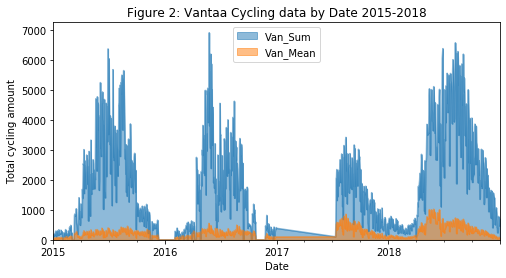

In [29]:
apps_van_sm_d=apps_van_sm.groupby('Date').sum()
by_days=pd.DatetimeIndex(apps_van_sm.Date).to_period("D")
apps_van_sm_d=apps_van_sm.groupby(by_days).sum()

df_van=pd.DataFrame(apps_van_sm_d,index=apps_van_sm_d.index,columns=['Van_Sum', 'Van_Mean']);
df_van=df_van.plot(kind='area',stacked=False, figsize=(8,4),title=('Figure 2: Vantaa Cycling data by Date 2015-2018'),rot=0,fontsize=10);
l = plt.axhline(y=0, linewidth=1, color='black')
df_van.set_ylabel('Total cycling amount')


Findings:
    - There are a lot of missing data from many periods of 2015-2017. 
    - The year 2018 data is relatively in good shape but still with less measurements data than it should have.
    - The volumn of total bikes are relatively lower than Espoo

###### 1.3 Helsinki Cycling Data handling and plotting
    - Form the dataframe rows(hour based) and coulumns based one the sum of each stations' data.
    - Plot sum data grouped by the date so that we can provide the intervals for further analysis
    - Plot sum data grouped by month so that we can provide the local peak values and detail information 
  

In [30]:
#Helsinki Cycling Data handling
apps_hel['Date']=pd.to_datetime(apps_hel.Date,errors='coerce')
apps_hel['Hel_Sum']=apps_hel.iloc[:,3:].sum(axis=1)
apps_hel['Hel_Mean']=apps_hel.iloc[:,3:-1].mean(axis=1)
apps_hel['Weekday'] = apps_hel['Date'].apply(lambda x: calendar.day_name[x.weekday()])
apps_hel_sm=apps_hel[['Weekday','Date','Time','Hel_Sum','Hel_Mean']]
apps_hel_sm.head()

,Weekday,Date,Time,Hel_Sum,Hel_Mean
0,Wednesday,2014-01-01,00:00:00,37.0,5.285714
1,Wednesday,2014-01-01,01:00:00,32.0,4.571429
2,Wednesday,2014-01-01,02:00:00,33.0,4.714286
3,Wednesday,2014-01-01,03:00:00,19.0,2.714286
4,Wednesday,2014-01-01,04:00:00,21.0,3.000000


Text(0, 0.5, 'Total cycling amount')

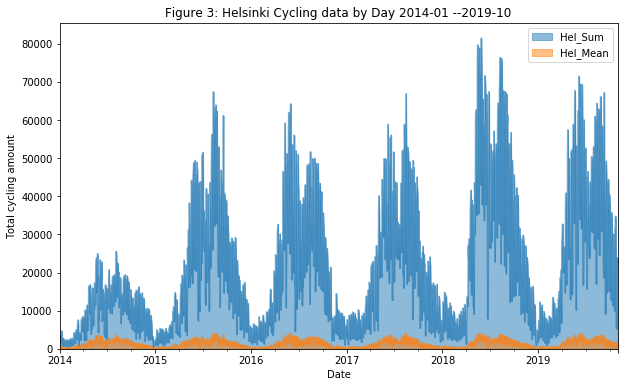

In [31]:
#The Helsinki data plot by month
by_date=pd.DatetimeIndex(apps_hel_sm.Date).to_period("D")
apps_hel_sm_d=apps_hel_sm.groupby(by_date).sum()
df_hel=pd.DataFrame(apps_hel_sm_d,index=apps_hel_sm_d.index,columns=['Hel_Sum', 'Hel_Mean']);
df_hel=df_hel.plot(kind='area',stacked=False, figsize=(10,6),title=('Figure 3: Helsinki Cycling data by Day 2014-01 --2019-10'),rot=0,fontsize=10);
l = plt.axhline(y=0, linewidth=1, color='black')
df_hel.set_ylabel('Total cycling amount')

Findings:

- The Helsinki cycling data is available from 2014 to 2019-10-31
- There are few missing data from the year during the whole period
- The year 2018 data is relatively in good shape but still with missing measurements

- The volumn of total bikes are much higher than Espoo's and Vantaa's.

###### 2. Data grouping and Visualizing.


###### 2.1 Helsinki data groupby the "Date". 
This analysis is based on data we have from automated bicycle counters with full year of validated data in 2014 - 2018. Total bicycle counts have been summed-up for each hour of the day.


In [32]:
hel_2014=apps_hel_sm.loc[apps_hel_sm.Date.between('2014-01-01','2014-12-31')].groupby('Date').sum()
hel_2014_max_d=hel_2014.loc[hel_2014.Hel_Sum==hel_2014.Hel_Sum.max()]
print('\nHelsinki max cycling day in 2014 is:\n', hel_2014_max_d)

hel_2015=apps_hel_sm.loc[apps_hel_sm.Date.between('2015-01-01','2015-12-31')].groupby('Date').sum()
hel_2015_max_d=hel_2015.loc[hel_2015.Hel_Sum==hel_2015.Hel_Sum.max()]
print('\nHelsinki max cycling day in 2015 is:\n', hel_2015_max_d)

hel_2016=apps_hel_sm.loc[apps_hel_sm.Date.between('2016-01-01','2016-12-31')].groupby('Date').sum()
hel_2016_max_d=hel_2016.loc[hel_2016.Hel_Sum==hel_2016.Hel_Sum.max()]
print('\nHelsinki max cycling day in 2016 is:\n', hel_2016_max_d)

hel_2017=apps_hel_sm.loc[apps_hel_sm.Date.between('2017-01-01','2017-12-31')].groupby('Date').sum()
hel_2017_max_d=hel_2017.loc[hel_2017.Hel_Sum==hel_2017.Hel_Sum.max()]
print('\nHelsinki max cycling day in 2017 is:\n', hel_2017_max_d)

hel_2018=apps_hel_sm.loc[apps_hel_sm.Date.between('2018-01-01','2018-12-31')].groupby('Date').sum()
hel_2018_max_d=hel_2018.loc[hel_2018.Hel_Sum==hel_2018.Hel_Sum.max()]
print('\nHelsinki max cycling day in 2018 is:\n', hel_2018_max_d)


Helsinki max cycling day in 2014 is:
             Hel_Sum  Hel_Mean
Date                         
2014-08-05  25550.0    3650.0

Helsinki max cycling day in 2015 is:
             Hel_Sum  Hel_Mean
Date                         
2015-08-11  67408.0    4213.0

Helsinki max cycling day in 2016 is:
             Hel_Sum  Hel_Mean
Date                         
2016-06-01  64236.0   4014.75

Helsinki max cycling day in 2017 is:
             Hel_Sum   Hel_Mean
Date                          
2017-08-15  66887.0  4180.4375

Helsinki max cycling day in 2018 is:
             Hel_Sum  Hel_Mean
Date                         
2018-05-29  81458.0    4072.9


###### Findings:
    The most cycled day of Helsinki is 2018-05-29 with a volumn of 81458 cyclists.

###### 2.2 Helsinki data groupby the "Month".

This analysis is based on data we have from automated bicycle counters with full year of validated data in 2014 - 2018. Total bicycle counts have been summed-up for each hour of the day, then summed-up to the month.

Conclusion: The most cycled month of Helsinki through 2014 – 2018 is August of 2018.

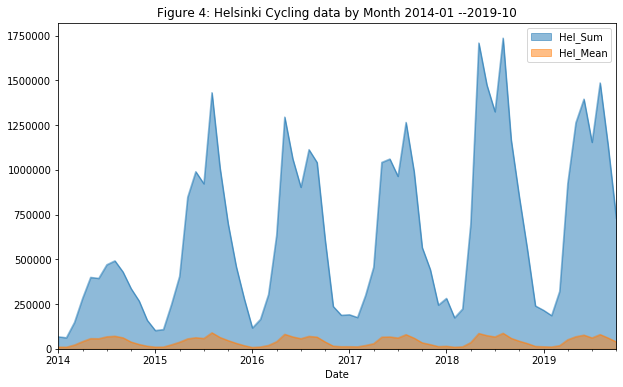

In [33]:
#The Helsinki plot by month
apps_hel_sm_d=apps_hel_sm.groupby('Date').sum()
by_month=pd.DatetimeIndex(apps_hel_sm.Date).to_period("M")
apps_hel_sm_m=apps_hel_sm.groupby(by_month).sum()
df_hel=pd.DataFrame(apps_hel_sm_m,index=apps_hel_sm_m.index,columns=['Hel_Sum', 'Hel_Mean']);
df_hel=df_hel.plot(kind='area',stacked=False, figsize=(10,6),title=('Figure 4: Helsinki Cycling data by Month 2014-01 --2019-10'),rot=0,fontsize=10);
l = plt.axhline(y=0, linewidth=1, color='black')


In [34]:
hel_2014_m=apps_hel_sm_m.filter(like='2014', axis=0)
print('\nHelsinki biggest cycling data month in 2014 is:\n', hel_2014_m.Hel_Sum.nlargest(3))
print('\nHelsinki smallest cycling data month in 2014 is:\n', hel_2014_m.Hel_Sum.nsmallest(3))

hel_2015_m=apps_hel_sm_m.filter(like='2015', axis=0)
print('\nHelsinki biggest cycling data month in 2015 is:\n', hel_2015_m.Hel_Sum.nlargest(3))
print('\nHelsinki smallest cycling data month in 2015 is:\n', hel_2015_m.Hel_Sum.nsmallest(3))

hel_2016_m=apps_hel_sm_m.filter(like='2016', axis=0)
print('\nHelsinki biggest cycling data month in 2016 is:\n', hel_2016_m.Hel_Sum.nlargest(3))
print('\nHelsinki smallest cycling data month in 2016 is:\n', hel_2016_m.Hel_Sum.nsmallest(3))

hel_2017_m=apps_hel_sm_m.filter(like='2017', axis=0)
print('\nHelsinki biggest cycling data month in 2017 is:\n', hel_2017_m.Hel_Sum.nlargest(3))
print('\nHelsinki smallest cycling data month in 2017 is:\n', hel_2017_m.Hel_Sum.nsmallest(3))

hel_2018_m=apps_hel_sm_m.filter(like='2018', axis=0)
print('\nHelsinki biggest cycling data month in 2018 is:\n', hel_2018_m.Hel_Sum.nlargest(3))
print('\nHelsinki smallest cycling data month in 2018 is:\n', hel_2018_m.Hel_Sum.nsmallest(3))


Helsinki biggest cycling data month in 2014 is:
 Date
2014-08    491316.0
2014-07    469481.0
2014-09    429169.0
Freq: M, Name: Hel_Sum, dtype: float64

Helsinki smallest cycling data month in 2014 is:
 Date
2014-02     61616.0
2014-01     66877.0
2014-03    147280.0
Freq: M, Name: Hel_Sum, dtype: float64

Helsinki biggest cycling data month in 2015 is:
 Date
2015-08    1430754.0
2015-09    1010384.0
2015-06     989366.0
Freq: M, Name: Hel_Sum, dtype: float64

Helsinki smallest cycling data month in 2015 is:
 Date
2015-01    101886.0
2015-02    107579.0
2015-03    247809.0
Freq: M, Name: Hel_Sum, dtype: float64

Helsinki biggest cycling data month in 2016 is:
 Date
2016-05    1294340.0
2016-08    1112530.0
2016-06    1060548.0
Freq: M, Name: Hel_Sum, dtype: float64

Helsinki smallest cycling data month in 2016 is:
 Date
2016-01    116397.0
2016-02    164486.0
2016-12    187283.0
Freq: M, Name: Hel_Sum, dtype: float64

Helsinki biggest cycling data month in 2017 is:
 Date
2017-08    1

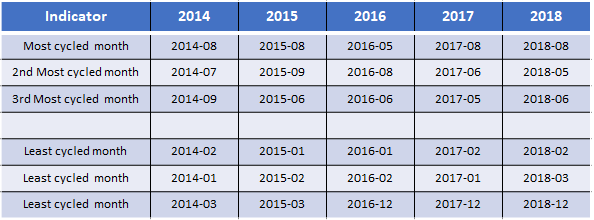

###### 2.3 Helsinki data groupby the "Weekday" and "Time".

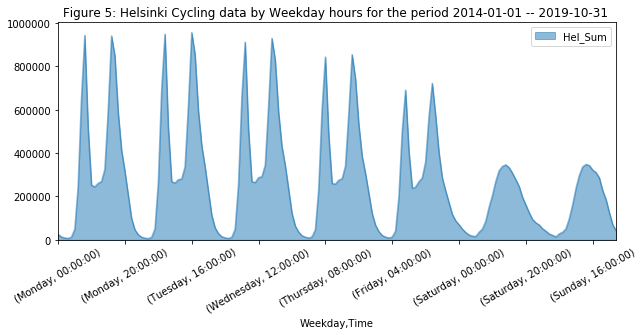

In [35]:
import calendar
from pandas.api.types import CategoricalDtype
apps_hel_sm_wt=apps_hel_sm.copy()

cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
apps_hel_sm_wt['Weekday'] = apps_hel_sm_wt['Weekday'].astype(cat_type)
apps_hel_sm_by_time = apps_hel_sm_wt.groupby(['Weekday','Time']).agg({'Hel_Sum': 'sum'})

df5=pd.DataFrame(apps_hel_sm_by_time,index=apps_hel_sm_by_time.index,columns=['Hel_Sum']);
df5=df5.plot(kind='area',stacked=False, figsize=(10,4),title=('Figure 5: Helsinki Cycling data by Weekday hours for the period 2014-01-01 -- 2019-10-31 '),rot=30,fontsize=10);
l = plt.axhline(y=0, linewidth=1, color='black')

In [36]:

print('\nHelsinki most cycled hour in Weekday:\n', apps_hel_sm_by_time.Hel_Sum.nlargest(3))

hel_monday=apps_hel_sm_by_time.filter(like='Monday', axis=0)
print('\nHelsinki busy cycling hour on Monday is:\n', hel_monday.Hel_Sum.nlargest(3))
print('\nHelsinki quiet cycling hour on Monday is:\n', hel_monday.Hel_Sum.nsmallest(3))

hel_tue=apps_hel_sm_by_time.filter(like='Tuesday', axis=0)
print('\nHelsinki busy cycling hour on Tuesday is:\n', hel_tue.Hel_Sum.nlargest(3))
print('\nHelsinki quiet cycling hour on Tuesday is:\n', hel_tue.Hel_Sum.nsmallest(3))

hel_wed=apps_hel_sm_by_time.filter(like='Wednesday', axis=0)
print('\nHelsinki busy cycling hour on Wednesday is:\n', hel_wed.Hel_Sum.nlargest(3))
print('\nHelsinki quiet cycling hour on Wednesday is:\n', hel_wed.Hel_Sum.nsmallest(3))

hel_thu=apps_hel_sm_by_time.filter(like='Thursday', axis=0)
print('\nHelsinki busy cycling hour on Thursday is:\n', hel_thu.Hel_Sum.nlargest(3))
print('\nHelsinki quiet cycling hour on Thursday is:\n', hel_thu.Hel_Sum.nsmallest(3))

hel_fri=apps_hel_sm_by_time.filter(like='Friday', axis=0)
print('\nHelsinki busy cycling hour on Friday is:\n', hel_fri.Hel_Sum.nlargest(3))
print('\nHelsinki quiet cycling hour on Friday is:\n', hel_fri.Hel_Sum.nsmallest(3))

hel_sat=apps_hel_sm_by_time.filter(like='Saturday', axis=0)
print('\nHelsinki busy cycling hour on Saturday is:\n', hel_sat.Hel_Sum.nlargest(3))
print('\nHelsinki quiet cycling hour on Saturday is:\n', hel_sat.Hel_Sum.nsmallest(3))

hel_sun=apps_hel_sm_by_time.filter(like='Sunday', axis=0)
print('\nHelsinki busy cycling hour on Sunday is:\n', hel_sun.Hel_Sum.nlargest(3))
print('\nHelsinki quiet cycling hour on Sunday is:\n', hel_sun.Hel_Sum.nsmallest(3))




Helsinki most cycled hour in Weekday:
 Weekday  Time    
Tuesday  16:00:00    955547.0
         08:00:00    948130.0
Monday   08:00:00    942320.0
Name: Hel_Sum, dtype: float64

Helsinki busy cycling hour on Monday is:
 Weekday  Time    
Monday   08:00:00    942320.0
         16:00:00    939780.0
         17:00:00    848322.0
Name: Hel_Sum, dtype: float64

Helsinki quiet cycling hour on Monday is:
 Weekday  Time    
Monday   03:00:00     6169.0
         02:00:00     8405.0
         04:00:00    12211.0
Name: Hel_Sum, dtype: float64

Helsinki busy cycling hour on Tuesday is:
 Weekday  Time    
Tuesday  16:00:00    955547.0
         08:00:00    948130.0
         17:00:00    853217.0
Name: Hel_Sum, dtype: float64

Helsinki quiet cycling hour on Tuesday is:
 Weekday  Time    
Tuesday  03:00:00     5242.0
         02:00:00     7424.0
         04:00:00    11371.0
Name: Hel_Sum, dtype: float64

Helsinki busy cycling hour on Wednesday is:
 Weekday    Time    
Wednesday  16:00:00    928998.0
  

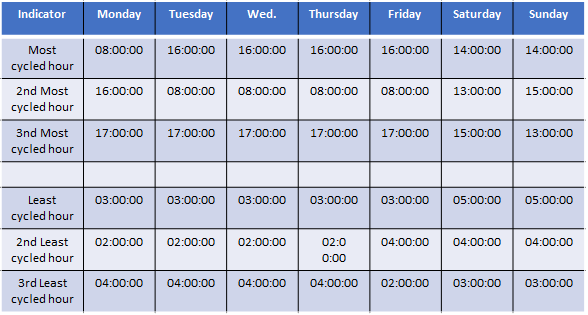

###### Findings:
    The most cycled hours during the weekdays are mainly located to the rush hours during the working days. <br>
    The peak of the working day is "Tuesday  16:00:00    sum=955547.0".<br>
    The peak of the weekend day is "Sunday   14:00:00    sum=347658.0".<br>
    But the least cycled hours during the weekends are much higher than the Working days' data. It indicates there were a lot of people spent nights in the city and return to home by bikes during the weekends.

###### 3.Helsinki, Vantaa and Espoo Cycling data and Hourly Profiles in 2018

This analysis is based on data we have from automated bicycle counters with a full year of validated data in 2018. Total bicycle counts have been summed-up for each day of the year of each city. 

In [37]:
hel_18=apps_hel_sm.loc[apps_hel_sm.Date.between('2018-01-01','2018-12-31')]
van_18=apps_van_sm.loc[apps_van_sm.Date.between('2018-01-01','2018-12-31')]
esp_18=apps_esp_sm.loc[apps_esp_sm.Date.between('2018-01-01','2018-12-31')]
hel_van_18=pd.merge(hel_18, van_18, how='outer', on=['Weekday','Date','Time'])
hel_van_esp_18=pd.merge(hel_van_18,esp_18, how='outer', on=['Weekday','Date','Time'])
hel_van_esp_18

,Weekday,Date,Time,Hel_Sum,Hel_Mean,Van_Sum,Van_Mean,Esp_Sum,Esp_Mean
0,Monday,2018-01-01,00:00:00,113.0,5.650000,3.0,0.600000,8.0,4.000000
1,Monday,2018-01-01,01:00:00,82.0,4.100000,7.0,1.400000,3.0,1.500000
2,Monday,2018-01-01,02:00:00,53.0,2.650000,5.0,1.000000,2.0,1.000000
3,Monday,2018-01-01,03:00:00,47.0,2.350000,0.0,0.000000,5.0,2.500000
4,Monday,2018-01-01,04:00:00,32.0,1.600000,2.0,0.400000,5.0,2.500000
...,...,...,...,...,...,...,...,...,...
8755,Monday,2018-12-31,19:00:00,103.0,5.722222,11.0,1.222222,186.0,16.909091
8756,Monday,2018-12-31,20:00:00,94.0,5.222222,17.0,1.888889,130.0,11.818182
8757,Monday,2018-12-31,21:00:00,56.0,3.111111,4.0,0.444444,93.0,8.454545
8758,Monday,2018-12-31,22:00:00,54.0,3.000000,6.0,0.666667,74.0,6.727273


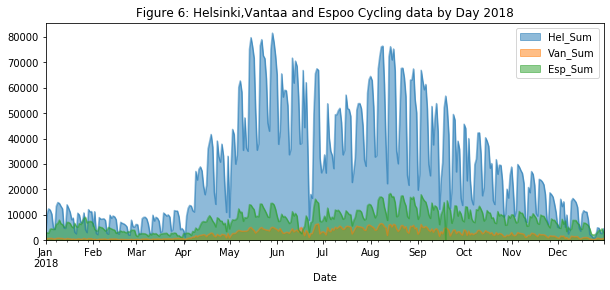

In [38]:
by_18_date=pd.DatetimeIndex(hel_van_esp_18.Date).to_period("D")
hvs_18_by_d=hel_van_esp_18.groupby(by_18_date).sum()
df_hvs_18_by_d=pd.DataFrame(hvs_18_by_d,index=hvs_18_by_d.index,columns=['Hel_Sum','Van_Sum','Esp_Sum']);
df_hvs_18_by_d=df_hvs_18_by_d.plot(kind='area',stacked=False, figsize=(10,4),title=('Figure 6: Helsinki,Vantaa and Espoo Cycling data by Day 2018'),rot=0,fontsize=10);
l = plt.axhline(y=0, linewidth=1, color='black')


In [39]:
hvs_18_by_d_total=hvs_18_by_d.Hel_Sum+hvs_18_by_d.Van_Sum+hvs_18_by_d.Esp_Sum
hvs_18_by_d_total
print('\nHelsinki, Vantaa and Espoo Most cycled days in year 2018 is:\n', hvs_18_by_d_total.nlargest(3))
print('\nHelsinki, Vantaa and Espoo Least cycled days in year 2018 is:\n', hvs_18_by_d_total.nsmallest(3))


Helsinki, Vantaa and Espoo Most cycled days in year 2018 is:
 Date
2018-05-29    101110.0
2018-08-14    100756.0
2018-08-08     99665.0
Freq: D, dtype: float64

Helsinki, Vantaa and Espoo Least cycled days in year 2018 is:
 Date
2018-12-24    3290.0
2018-12-25    3330.0
2018-04-02    3893.0
Freq: D, dtype: float64


In [40]:
print('\nHelsinki Most cycled days in year 2018 is:\n', hvs_18_by_d.Hel_Sum.nlargest(3))
print('\nHelsinki Least cycled days in year 2018 is:\n', hvs_18_by_d.Hel_Sum.nsmallest(3))
print('\nVantaa Most cycled days in year 2018 is:\n', hvs_18_by_d.Van_Sum.nlargest(3))
print('\nVantaa Least cycled days in year 2018 is:\n', hvs_18_by_d.Van_Sum.nsmallest(3))
print('\nEspoo Most cycled days in year 2018 is:\n', hvs_18_by_d.Esp_Sum.nlargest(3))
print('\nEspoo Least cycled days in year 2018 is:\n', hvs_18_by_d.Esp_Sum.nsmallest(3))


Helsinki Most cycled days in year 2018 is:
 Date
2018-05-29    81458.0
2018-05-15    79673.0
2018-05-22    78893.0
Freq: D, Name: Hel_Sum, dtype: float64

Helsinki Least cycled days in year 2018 is:
 Date
2018-12-25     936.0
2018-12-24     990.0
2018-04-02    1233.0
Freq: D, Name: Hel_Sum, dtype: float64

Vantaa Most cycled days in year 2018 is:
 Date
2018-08-08    6582.0
2018-06-28    6387.0
2018-08-07    6315.0
Freq: D, Name: Van_Sum, dtype: float64

Vantaa Least cycled days in year 2018 is:
 Date
2018-04-02     98.0
2018-01-01    174.0
2018-02-24    174.0
Freq: D, Name: Van_Sum, dtype: float64

Espoo Most cycled days in year 2018 is:
 Date
2018-08-14    18392.0
2018-08-13    17947.0
2018-09-03    17902.0
Freq: D, Name: Esp_Sum, dtype: float64

Espoo Least cycled days in year 2018 is:
 Date
2018-09-19      29.0
2018-03-31    1096.0
2018-03-30    1254.0
Freq: D, Name: Esp_Sum, dtype: float64


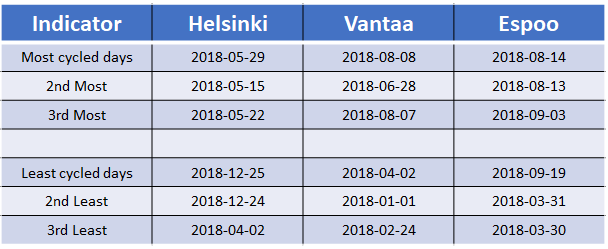

###### Findings:
The Least cycled days in Espoo is: 2018-09-19 which is not in reality. Then we find there is only one record on Wed 2018-09-19 ,00:00:00 available for that day.

Tue,2018-09-18,23:00:00,12.0,4.0,1.0,,,,,3.0,,,,,,,,,,,,4.0,,,,0.0,,,,,,2.0,,,2.0,,,16.0,3.0,,,2.0
Wed,2018-09-19,00:00:00,7.0,0.0,0.0,,,,,6.0,,,,,,,,,,,,3.0,,,,4.0,,,,,,1.0,,,0.0,,,5.0,2.0,,,1.0
Thu,2018-09-20,01:00:00,2.0,0.0,1.0,,,,,2.0,,,,,,,,,,,,2.0,,,,0.0,,,,,,0.0,,,1.0,,,1.0,0.0,,,0.0

###### 3.2 Construct dataframe by the mean value of Helsinki, Vantaa and Espoo data.
The percentage of cycling Hourly Profile is calculated by comparing the average number of cyclists of each hour with the average daily traffic for every city.

In [41]:
hve_18_hp=hel_van_esp_18.filter(['Date','Time','Hel_Mean','Van_Mean','Esp_Mean'],axis=1)
hve_18_hp['Total_mean']=hve_18_hp.iloc[:,2:-1].mean(axis=1)
hve_18_hp=hve_18_hp.groupby(['Date','Time']).agg({'Hel_Mean':'mean','Van_Mean': 'mean','Esp_Mean':'mean','Total_mean':'mean'})

base = hve_18_hp.groupby(['Date']).agg({'Hel_Mean': 'sum','Van_Mean': 'sum','Esp_Mean':'sum','Total_mean':'sum'})
hve_18_hpp=hve_18_hp.div(base, level='Date') * 100

hve_18_hpp.head(30)

Hel_Mean   Van_Mean  Esp_Mean  Total_mean
Date       Time                                                
2018-01-01 00:00:00   4.879102   1.724138  0.310078    4.150066
           01:00:00   3.540587   4.022989  0.116279    3.652058
           02:00:00   2.288428   2.873563  0.077519    2.423639
           03:00:00   2.029361   0.000000  0.193798    1.560425
           04:00:00   1.381693   1.149425  0.193798    1.328021
           05:00:00   0.734024   0.574713  0.387597    0.697211
           06:00:00   2.417962   1.724138  2.054264    2.257636
           07:00:00   2.720207   1.149425  4.767442    2.357238
           08:00:00   2.072539   0.000000  5.503876    1.593625
           09:00:00   1.683938   5.747126  5.232558    2.622842
           10:00:00   2.763385   6.896552  4.961240    3.718459
           11:00:00   4.274611   4.022989  6.201550    4.216467
           12:00:00   6.174439   9.770115  7.209302    7.005312
           13:00:00   8.635579   6.321839  7.248062    8.100930
           14:00:00  10.189983  10.919540  6.511628   10.358566
           15:00:00   8.851468  14.367816  9.457364   10.126162
           16:00:00   8.160622   9.770115  9.496124    8.532537
           17:00:00   7.081174   6.896552  9.108527    7.038513
           18:00:00   6.303972   3.448276  7.635659    5.644090
           19:00:00   4.490501   3.448276  4.961240    4.249668
           20:00:00   3.324698   1.724138  3.565891    2.954847
           21:00:00   2.590674   2.873563  3.333333    2.656042
           22:00:00   2.417962   0.574713  1.085271    1.992032
           23:00:00   0.993092   0.000000  0.387597    0.763612
2018-01-02 00:00:00   0.229095   0.159490  0.272665    0.215650
           01:00:00   0.152730   0.000000  0.034083    0.123229
           02:00:00   0.124093   0.000000  0.068166    0.100123
           03:00:00   0.028637   0.318979  0.000000    0.084720
           04:00:00   0.315006   0.318979  0.204499    0.315773
           05:00:00   1.002291   2.073365  0.306748    1.209181

In [42]:
hve_18_p=hve_18_hpp.groupby(['Time']).mean().round(0)
hve_18_p

,Hel_Mean,Van_Mean,Esp_Mean,Total_mean
Time,,,,
00:00:00,1.0,0.0,1.0,1.0
01:00:00,1.0,0.0,1.0,0.0
02:00:00,0.0,0.0,1.0,0.0
03:00:00,0.0,0.0,0.0,0.0
04:00:00,0.0,0.0,1.0,0.0
05:00:00,1.0,1.0,1.0,1.0
06:00:00,3.0,4.0,3.0,3.0
07:00:00,6.0,6.0,6.0,6.0
08:00:00,9.0,5.0,7.0,8.0


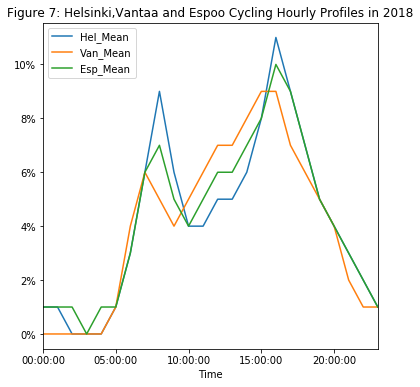

In [43]:
from matplotlib.ticker import FuncFormatter

df_hve_18_p=pd.DataFrame(hve_18_p,index=hve_18_p.index,columns=['Hel_Mean','Van_Mean','Esp_Mean']);
df_hve_18_p=df_hve_18_p.plot(kind='line',stacked=False, figsize=(6,6),title=('Figure 7: Helsinki,Vantaa and Espoo Cycling Hourly Profiles in 2018'),rot=0,fontsize=10);

df_hve_18_p.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0f}%'.format(y))) 

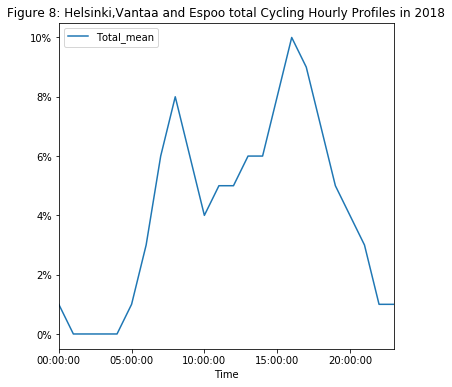

In [44]:
df_hve_18_pt=pd.DataFrame(hve_18_p,index=hve_18_p.index,columns=['Total_mean']);
df_hve_18_pt=df_hve_18_pt.plot(kind='line',stacked=False, figsize=(6,6),title=('Figure 8: Helsinki,Vantaa and Espoo total Cycling Hourly Profiles in 2018'),rot=0,fontsize=10);
df_hve_18_pt.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0f}%'.format(y))) 

###### Findings:
There are one peak time 8:00:00 in the morning, one peak time 16:00:00 in the afternoon on each day.<br>
The total Cycling Hourly Profiles in 2018 are very much aligned with the result found from "The Worldwide Cycling Index" page as below.


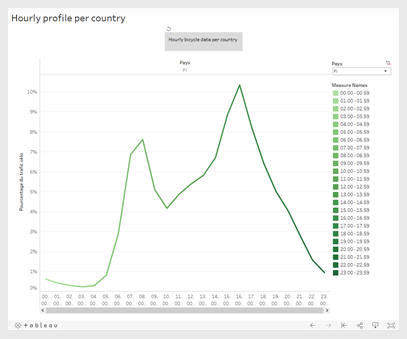